In [1]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

In [17]:
np.version.version
pd.__version__


'1.5.3'

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(url, sep=',', header=None)

In [3]:
iris = iris.set_axis(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], axis = 1)

In [4]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


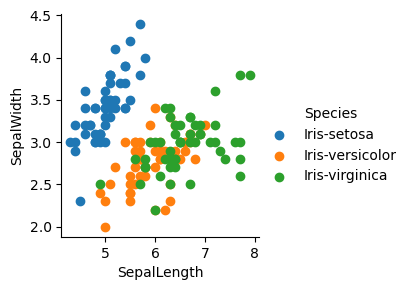

In [5]:
sns.FacetGrid(iris, hue='Species')\
   .map(plt.scatter, 'SepalLength', 'SepalWidth')\
   .add_legend();

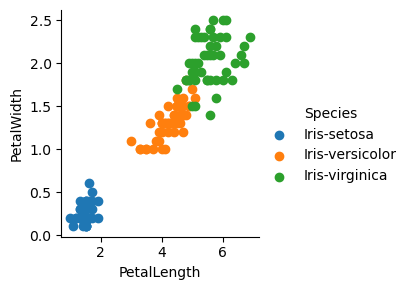

In [6]:
sns.FacetGrid(iris, hue='Species')\
   .map(plt.scatter, 'PetalLength', 'PetalWidth')\
   .add_legend();

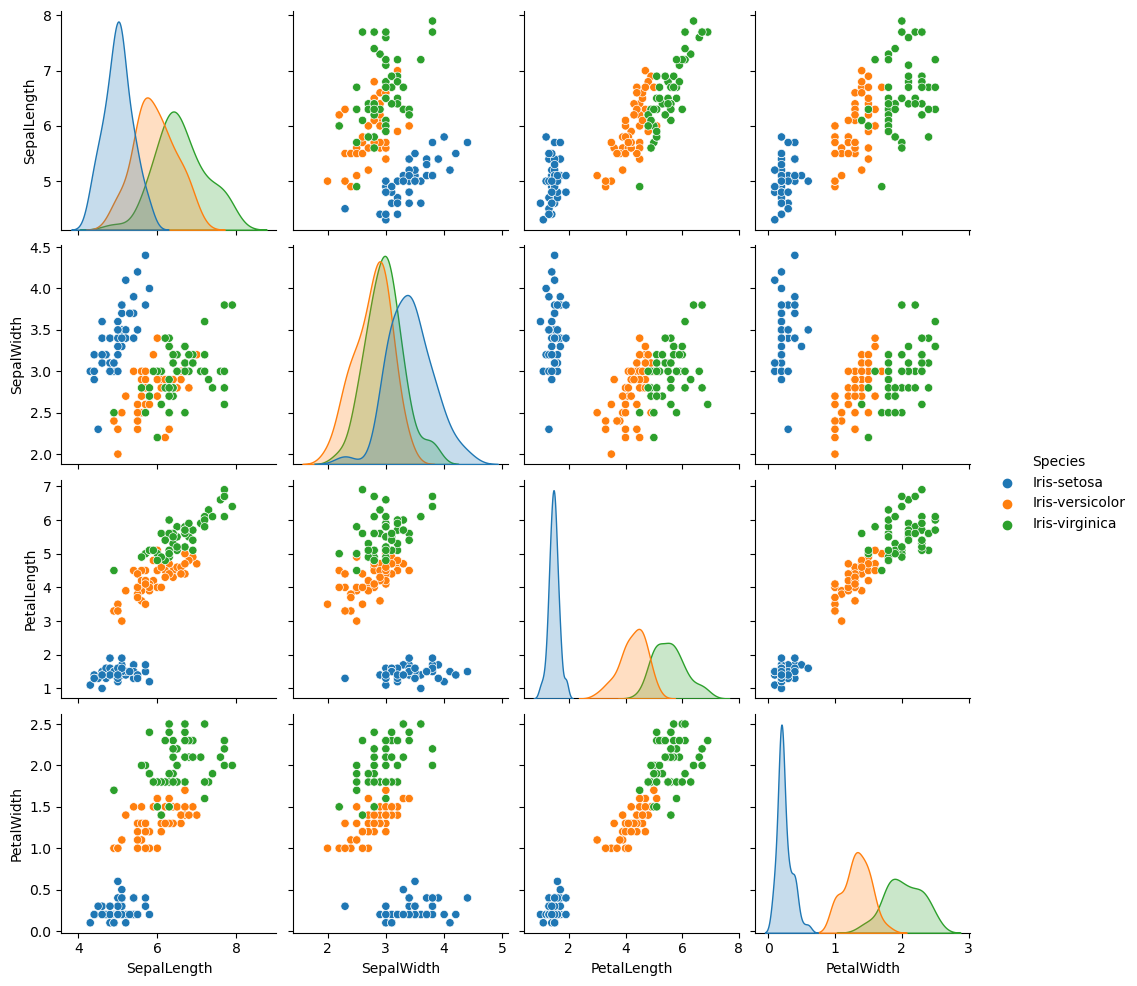

In [7]:
sns.pairplot(iris, hue = 'Species');

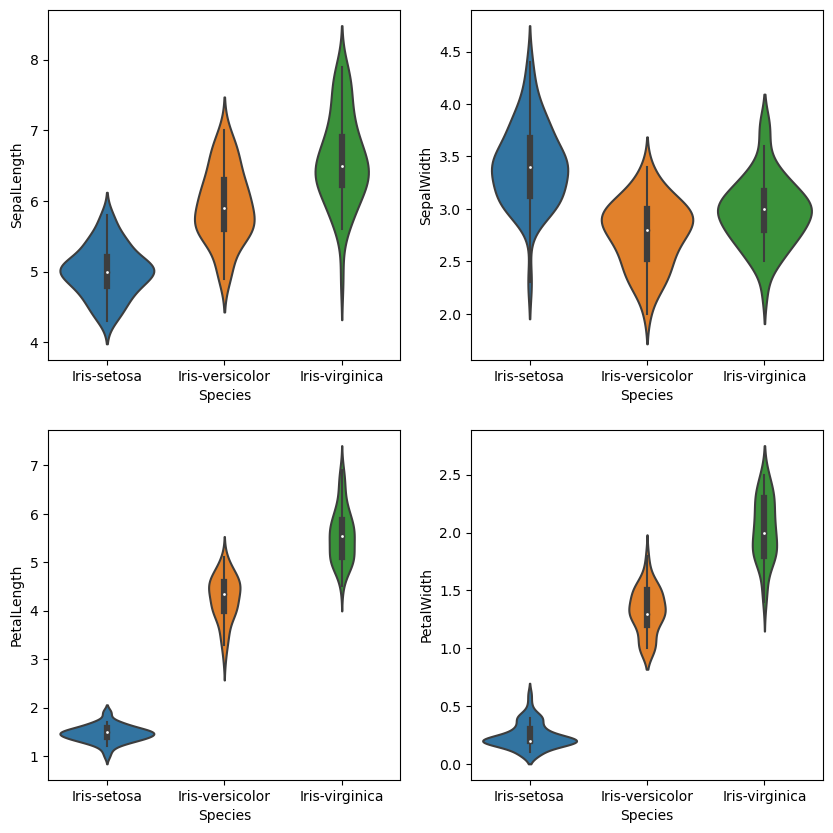

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLength', data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidth', data=iris)

plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLength', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidth', data=iris);

/var/folders/pr/pybk372j7p9_g1m5whty3n9c0000gn/T/ipykernel_28469/1957452194.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr()


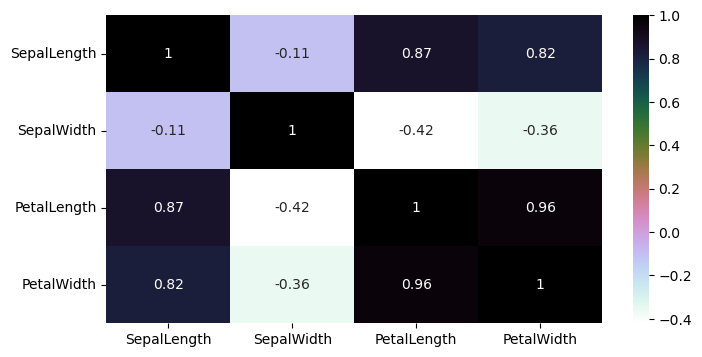

In [9]:
plt.figure(figsize=(8,4))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr() 
plt.show()

In [10]:
train, test = train_test_split(iris, test_size=0.3, random_state=3) 
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [11]:
X_train = train[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
y_train = train.Species

X_test = test[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
y_test = test.Species

Decision Tree. We can use it in ths situation without any changes of our dataset: dataset is clean

In [12]:
tree = DecisionTreeClassifier(random_state=3)
tree.fit(X_train, y_train)
prediction = tree.predict(X_test)
accuracy = tree.score(X_test, y_test)
print("Model accuracy of DT:", accuracy)

Model accuracy of DT: 0.9333333333333333


Random forest

In [18]:
forest = RandomForestClassifier(random_state=3, max_depth = 2)
forest.fit(X_train, y_train)
accuracy = forest.score(X_test, y_test)
print("Model accuracy of RF:", accuracy)

Model accuracy of RF: 0.9555555555555556


Multinomial Logistic Regression

In [33]:
model = LogisticRegression(multi_class='multinomial', solver='saga', random_state=3, max_iter=1000)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, y_test))

The accuracy of Logistic Regression is:  0.9777777777777777


/Users/valeriia/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Data is not scaled - therefore we have this problem

SVM

In [35]:
model = svm.SVC(random_state=3)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, y_test))

The accuracy of the SVM is:  0.9777777777777777


K-Nearest Neighbors

In [36]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, y_test))

The accuracy of KNN is:  0.9555555555555556


PCA

In [37]:
features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

In [38]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
x = iris.loc[:, features].values

# Separating out the target
y = iris.loc[:,['Species']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [39]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [40]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [41]:
finalDf = pd.concat([principalDf, iris[['Species']]], axis = 1)

In [42]:
finalDf.head()

,principal component 1,principal component 2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


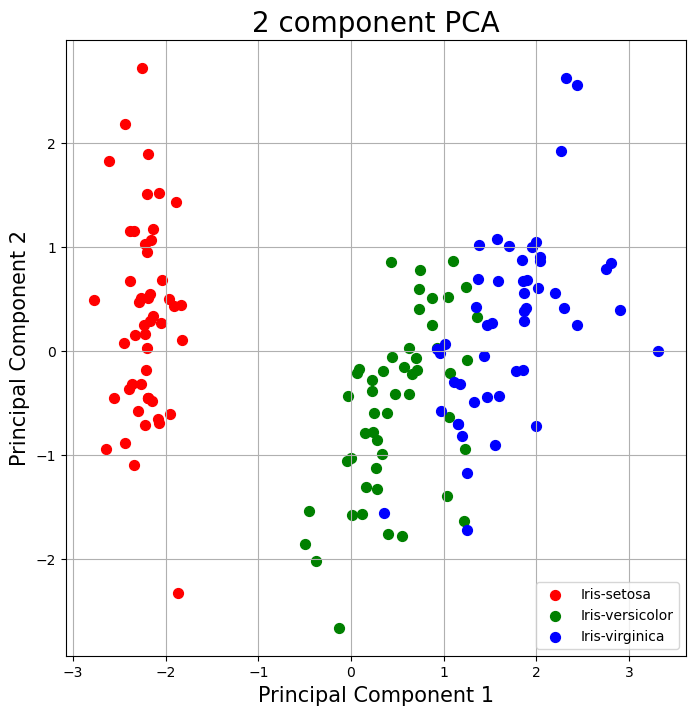

In [43]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], 
               finalDf.loc[indicesToKeep, 'principal component 2'], 
               c = color, 
               s = 50)
ax.legend(targets)
ax.grid()

**Ex 1** Your task is use CV where it's possible and make a table with best values for each method

**Ex 2** Your next task is scale the data for next methods: SVM, KNN and MLR and check if it worked better

**Ex 3** Explain which method is the best and why, don't forget about classification quality metrics: Accuracy, Precision, Recall, F1